In [58]:
# Imports
import pandas as pd

In [59]:
# Read dataframe from csv file
file = "./data/processed_data/2014_2022_moneyness_and_TTM_filtered.csv"
df = pd.read_csv(file)

<AxesSubplot: ylabel='Frequency'>

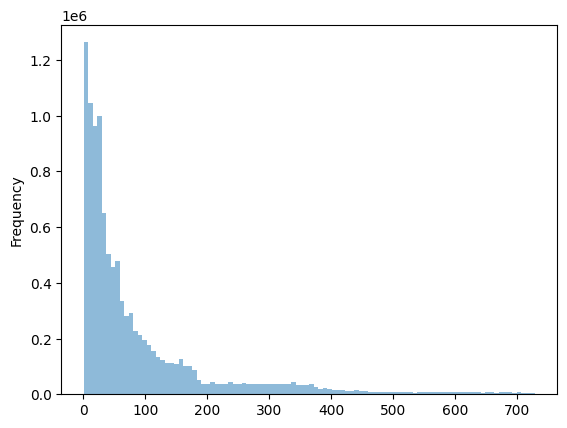

In [60]:
# Plot distribution of TTM
df['TTM'].plot.hist(bins=100, alpha=0.5)

<AxesSubplot: ylabel='Frequency'>

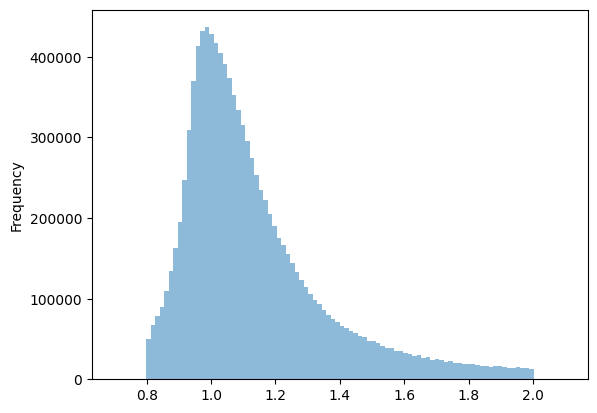

In [61]:
# Plot the distribution of moneyness in the range 0.7 and 2.1
df['Moneyness'].plot.hist(bins=100, alpha=0.5, range = (0.7, 2.1))

In [62]:
# Finding interval that defines one standard deviation of moneyness
df['Moneyness'].describe()

count    1.068991e+07
mean     1.133789e+00
std      2.242085e-01
min      8.000000e-01
25%      9.804022e-01
50%      1.073093e+00
75%      1.221913e+00
max      1.999990e+00
Name: Moneyness, dtype: float64

<AxesSubplot: ylabel='Frequency'>

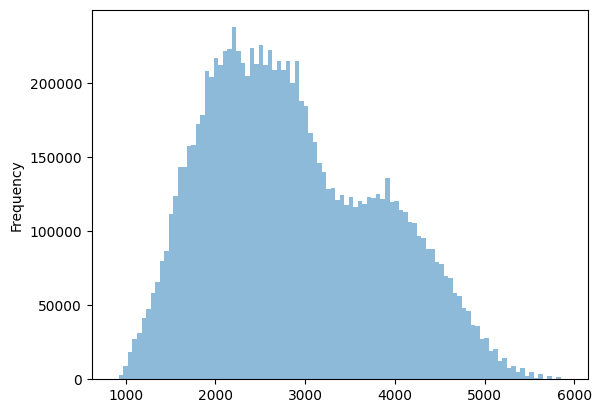

In [63]:
# Plot distribution of strike price
df['Strike'].plot.hist(bins=100, alpha=0.5)